<a href="https://colab.research.google.com/github/carlamoema/Imersao_dados_Alura/blob/main/Imersao_dados_4_aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as Bibliotecas que serão utilizadas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


Carregando o Dataset

In [ ]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

Reproduzindo códigos executados na Aula 02 - Preparando ambiente para realizar Desafios da Aula 02

In [ ]:
dados[["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = dados["Valor"].str.split(expand = True)
dados_vendas = dados[dados["Tipo_anuncio"].isnull()]
dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)

Desafios Aula 02

1.   Criar uma escala de valores em milhões




> 1ª Tentativa - Alterando apenas no gráfico



In [ ]:
sns.set()
plt.figure(figsize=(20, 8))
ax = sns.histplot(data = dados_vendas, x= "Valor_anuncio_float", kde = True)
ax.set_title("Distribuição da Quant. de Imóveis a Venda em SP",  fontweight ="bold")
ax.set_xlabel("Preço do Imóvel")
ax.set_ylabel("Quant. de Imóveis")

#Trecho de código extraído e adaptado da url https://acervolima.com/matplotlib-axes-axes-get_xscale-em-python/
import numpy as np 
from matplotlib.ticker import EngFormatter 
val = np.random.RandomState(19680801) 
xs = np.logspace(1, 9, 100)
ys = (0.8 + 4 * val.uniform(size = 100)) * np.log10(xs)**2
ax.set_xscale('log') 
formatter0 = EngFormatter(unit =' Reais') 
ax.xaxis.set_major_formatter(formatter0) 
ax.plot(xs, ys) 
w = ax.get_xscale()
plt.show()
###### Fim do código copiado ############



> 2ª Tentativa - Alterando na base de dados



In [ ]:
# Dividindo a série com os valores dos anúncios por 1 Milhão
# Gravando em uma nova série
dados_vendas["Valor_Milhoes"] = dados_vendas["Valor_anuncio_float"]/(1000000.00)
dados_vendas.head()

In [ ]:
dados_vendas.describe()

In [ ]:
# Criando o gráfico
plt.figure(figsize=(20, 8))
ax = sns.histplot(data = dados_vendas, x= "Valor_Milhoes", kde = True)
ax.set_title("Distribuição da Quant. de Imóveis a Venda em SP",  fontweight ="bold")
ax.set_xlabel("Preço do Imóvel")
ax.set_ylabel("Quant. de Imóveis")
Unid_x = EngFormatter(unit =' Milhões') 
ax.xaxis.set_major_formatter(Unid_x) 
Unid_y = EngFormatter(unit =' Unid') 
ax.yaxis.set_major_formatter(Unid_y) 
x = np.arange(1,10,0.2)
y = np.sin(x)
ax.plot(x,y)
plt.show()



2.   Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)

In [ ]:
# Usando a 2a opção, deixando o gráfico mais amigável, intuitivo.

plt.figure(figsize=(20, 8))
ax = sns.histplot(data = dados_vendas, x= "Valor_Milhoes", kde = True)
ax.set_title("Distribuição da Quant. de Imóveis a Venda em SP", fontsize=14, fontweight ="bold")
ax.set_xlabel("Preço do Imóvel")
ax.set_ylabel("Quant. de Imóveis")
Unid_x = EngFormatter(unit =' Milhões') 
ax.xaxis.set_major_formatter(Unid_x) 
ax.set_facecolor('#eafff5')

x = np.arange(-5,10,0.2)
y = np.sin(x)
ax.plot(x,y)


plt.show()

In [ ]:
dados_vendas.head(5)


3. Preço do metro quadrado por bairro e plotar em um gráfico ideal.

In [ ]:
#Criando a série com o valor por m2 ["Valor_M2"]
dados_vendas["Valor_M2"] = dados_vendas["Valor_anuncio_float"]/dados_vendas["Metragem"].astype(float)

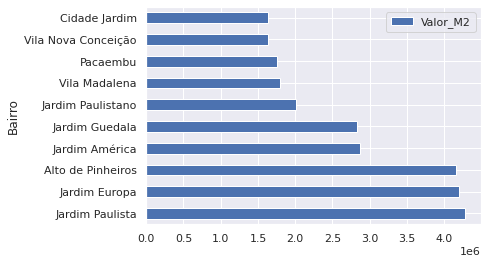

In [12]:
#Agrupando por bairro, criando um novo dataframe
Bairro_M2 = pd.DataFrame(dados_vendas.groupby("Bairro")["Valor_M2"].sum())

#Criando o gráfico simples com os 10 bairros cujo valor do M2 ficou mais alto
Bairro_M2.sort_values(by = "Valor_M2", ascending= False)[:10].plot(kind='barh')

4. Explorar as bibliotecas de visualizações e colocar as suas conclusão

In [13]:
#Criando um índice pro df
Bairro_M2=Bairro_M2.reset_index()

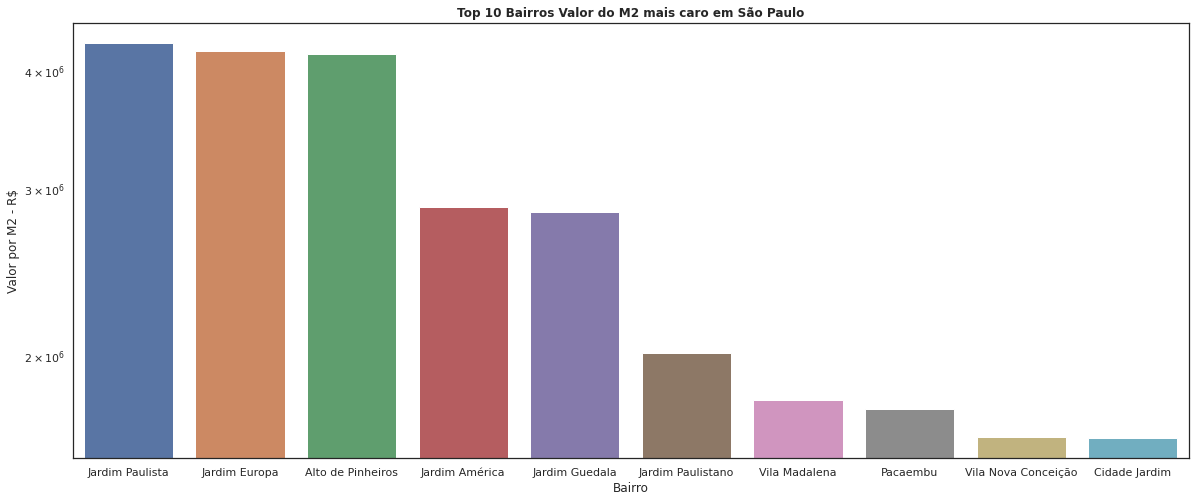

In [97]:
#Explorando outras formas de visualição com a biblioteca seaborn
plt.figure(figsize=(20, 8))
sns.set_style('white')
ax2 = sns.barplot(data=(Bairro_M2.sort_values(by = "Valor_M2", ascending=False)[:10]), x= "Bairro", y="Valor_M2")
ax2.set_xlabel("Bairro")
ax2.set_ylabel("Valor por M2 - R$")
ax2.set_title("Top 10 Bairros Valor do M2 mais caro em São Paulo",  fontweight ="bold")
ax2.set_yscale('log')



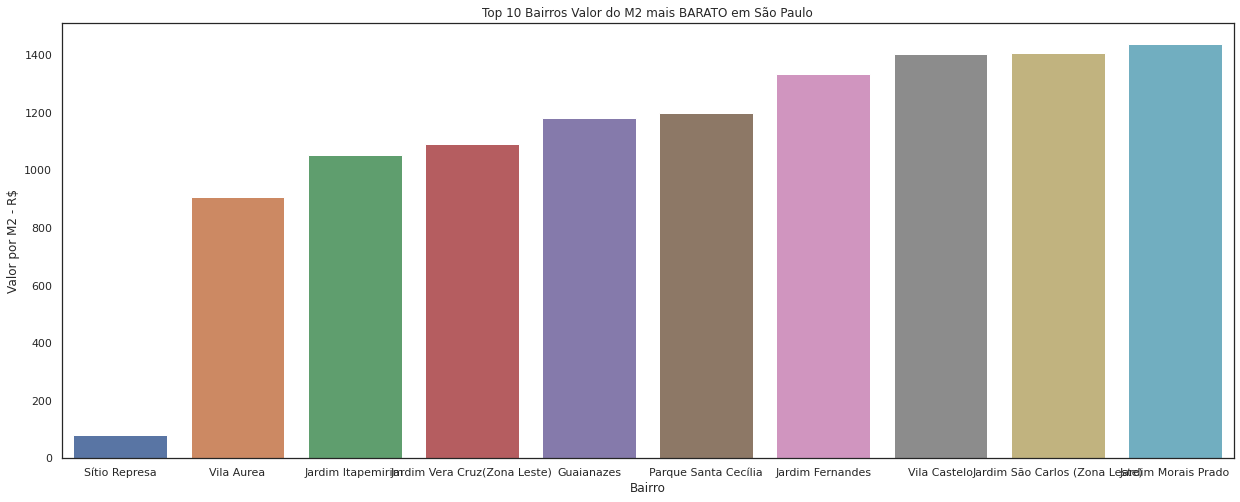

In [104]:
#Explorando outras formas de visualição com a biblioteca seaborn
plt.figure(figsize=(21, 8))
sns.axes_style("darkgrid")
ax3 = sns.barplot(data=(Bairro_M2.sort_values(by = "Valor_M2", ascending=True)[:10]), x= "Bairro", y="Valor_M2")
ax3.set_xlabel("Bairro")
ax3.set_ylabel("Valor por M2 - R$")
ax3.set_title("Top 10 Bairros Valor do M2 mais BARATO em São Paulo")
plt.show()

5. Pesquisar um visualização para analisar os quartis, mediana e outliers